![](http://static1.squarespace.com/static/56ccc8724c2f8548059fbcfe/58f6daea15d5dbcc64ef63aa/5cae2d770d92977242838baa/1557942174418/SW-DistractedDriving-Clean-1.jpg?format=1500w)

In [ ]:
#@title Run this to download data and prepare our environment! { display-mode: "form" }


import cv2
import numpy as np

def label_to_numpy(labels):
  final_labels = np.zeros((len(labels), 4))
  for i in range(len(labels)):
    label = labels[i]
    if label == 'Attentive':
      final_labels[i,:] = np.array([1, 0, 0, 0])
    if label == 'DrinkingCoffee':
      final_labels[i,:] = np.array([0, 1, 0, 0])
    if label == 'UsingMirror':
      final_labels[i,:] = np.array([0, 0, 1, 0])
    if label == 'UsingRadio':
      final_labels[i,:] = np.array([0, 0, 0, 1])
  return final_labels

def augment(data, augmenter):
  if len(data.shape) == 3:
    return augmenter.augment_image(data)
  if len(data.shape) == 4:
    return augmenter.augment_images(data)

def rotate(data, rotate):
  fun = augmenters.Affine(rotate = rotate)
  return augment(data, fun)

def shear(data, shear):
  fun = augmenters.Affine(shear = shear)
  return augment(data, fun)

def scale(data, scale):
  fun = augmenters.Affine(scale = shear)
  return augment(data, fun)

def flip_left_right(data):
  fun = augmenters.Fliplr()
  return augment(data, fun)

def flip_up_down(data):
  fun = augmenters.Flipud()
  return augment(data, fun)

def remove_color(data, channel):
  new_data = data.copy()
  if len(data.shape) == 3:
    new_data[:,:,channel] = 0
    return new_data
  if len(data.shape) == 4:
    new_data[:,:,:,channel] = 0
    return new_data

class pkg:
  #### DOWNLOADING AND LOADING DATA
  def get_metadata(metadata_path, which_splits = ['train', 'test']):
    '''returns metadata dataframe which contains columns of:
       * index: index of data into numpy data
       * class: class of image
       * split: which dataset split is this a part of?
    '''
    metadata = pd.read_csv(metadata_path)
    keep_idx = metadata['split'].isin(which_splits)
    metadata = metadata[keep_idx]

    # Get dataframes for each class.
    df_coffee_train = metadata[(metadata['class'] == 'DrinkingCoffee') & \
                         (metadata['split'] == 'train')]
    df_coffee_test = metadata[(metadata['class'] == 'DrinkingCoffee') & \
                         (metadata['split'] == 'test')]
    df_mirror_train = metadata[(metadata['class'] == 'UsingMirror') & \
                         (metadata['split'] == 'train')]
    df_mirror_test = metadata[(metadata['class'] == 'UsingMirror') & \
                         (metadata['split'] == 'test')]
    df_attentive_train = metadata[(metadata['class'] == 'Attentive') & \
                         (metadata['split'] == 'train')]
    df_attentive_test = metadata[(metadata['class'] == 'Attentive') & \
                         (metadata['split'] == 'test')]
    df_radio_train = metadata[(metadata['class'] == 'UsingRadio') & \
                         (metadata['split'] == 'train')]
    df_radio_test = metadata[(metadata['class'] == 'UsingRadio') & \
                         (metadata['split'] == 'test')]

    # Get number of items in class with lowest number of images.
    num_samples_train = min(df_coffee_train.shape[0], \
                            df_mirror_train.shape[0], \
                            df_attentive_train.shape[0], \
                            df_radio_train.shape[0])
    num_samples_test = min(df_coffee_test.shape[0], \
                            df_mirror_test.shape[0], \
                            df_attentive_test.shape[0], \
                            df_radio_test.shape[0])

    # Resample each of the classes and concatenate the images.
    metadata_train = pd.concat([df_coffee_train.sample(num_samples_train), \
                          df_mirror_train.sample(num_samples_train), \
                          df_attentive_train.sample(num_samples_train), \
                          df_radio_train.sample(num_samples_train) ])
    metadata_test = pd.concat([df_coffee_test.sample(num_samples_test), \
                          df_mirror_test.sample(num_samples_test), \
                          df_attentive_test.sample(num_samples_test), \
                          df_radio_test.sample(num_samples_test) ])

    metadata = pd.concat( [metadata_train, metadata_test] )

    return metadata

  def get_data_split(split_name, flatten, all_data, metadata, image_shape):
    '''
    returns images (data), labels from folder of format [image_folder]/[split_name]/[class_name]/
    flattens if flatten option is True
    '''
    # Get dataframes for each class.
    df_coffee_train = metadata[(metadata['class'] == 'DrinkingCoffee') & \
                         (metadata['split'] == 'train')]
    df_coffee_test = metadata[(metadata['class'] == 'DrinkingCoffee') & \
                         (metadata['split'] == 'test')]
    df_mirror_train = metadata[(metadata['class'] == 'UsingMirror') & \
                         (metadata['split'] == 'train')]
    df_mirror_test = metadata[(metadata['class'] == 'UsingMirror') & \
                         (metadata['split'] == 'test')]
    df_attentive_train = metadata[(metadata['class'] == 'Attentive') & \
                         (metadata['split'] == 'train')]
    df_attentive_test = metadata[(metadata['class'] == 'Attentive') & \
                         (metadata['split'] == 'test')]
    df_radio_train = metadata[(metadata['class'] == 'UsingRadio') & \
                         (metadata['split'] == 'train')]
    df_radio_test = metadata[(metadata['class'] == 'UsingRadio') & \
                         (metadata['split'] == 'test')]

    # Get number of items in class with lowest number of images.
    num_samples_train = min(df_coffee_train.shape[0], \
                            df_mirror_train.shape[0], \
                            df_attentive_train.shape[0], \
                            df_radio_train.shape[0])
    num_samples_test = min(df_coffee_test.shape[0], \
                            df_mirror_test.shape[0], \
                            df_attentive_test.shape[0], \
                            df_radio_test.shape[0])

    # Resample each of the classes and concatenate the images.
    metadata_train = pd.concat([df_coffee_train.sample(num_samples_train), \
                          df_mirror_train.sample(num_samples_train), \
                          df_attentive_train.sample(num_samples_train), \
                          df_radio_train.sample(num_samples_train) ])
    metadata_test = pd.concat([df_coffee_test.sample(num_samples_test), \
                          df_mirror_test.sample(num_samples_test), \
                          df_attentive_test.sample(num_samples_test), \
                          df_radio_test.sample(num_samples_test) ])

    metadata = pd.concat( [metadata_train, metadata_test] )

    sub_df = metadata[metadata['split'].isin([split_name])]
    index  = sub_df['index'].values
    labels = sub_df['class'].values
    data = all_data[index,:]
    if flatten:
      data = data.reshape([-1, np.product(image_shape)])
    return data, labels

  def get_train_data(flatten, all_data, metadata, image_shape):
    return get_data_split('train', flatten, all_data, metadata, image_shape)

  def get_test_data(flatten, all_data, metadata, image_shape):
    return get_data_split('test', flatten, all_data, metadata, image_shape)

  def get_field_data(flatten, all_data, metadata, image_shape):
    return get_data_split('field', flatten, all_data, metadata, image_shape)

class helpers:
  #### PLOTTING
  def plot_image(data, num_ims, figsize=(8,6), labels = [], index = None, image_shape = [64,64,3]):
    '''
    if data is a single image, display that image

    if data is a 4d stack of images, display that image
    '''
    print(data.shape)
    num_dims   = len(data.shape)
    num_labels = len(labels)

    # reshape data if necessary
    if num_dims == 1:
      data = data.reshape(target_shape)
    if num_dims == 2:
      data = data.reshape(-1,image_shape[0],image_shape[1],image_shape[2])
    num_dims   = len(data.shape)

    # check if single or multiple images
    if num_dims == 3:
      if num_labels > 1:
        print('Multiple labels does not make sense for single image.')
        return

      label = labels
      if num_labels == 0:
        label = ''
      image = data

    if num_dims == 4:
      image = data[index, :]
      label = labels[index]

    # plot image of interest

    nrows=int(np.sqrt(num_ims))
    ncols=int(np.ceil(num_ims/nrows))
    print(nrows,ncols)
    count=0
    if nrows==1 and ncols==1:
      print('Label: %s'%label)
      plt.imshow(image)
      plt.show()
    else:
      print(labels)
      fig = plt.figure(figsize=figsize)
      for i in range(nrows):
        for j in range(ncols):
          if count<num_ims:
            fig.add_subplot(nrows,ncols,count+1)
            plt.imshow(image[count])
            count+=1
      fig.set_size_inches(18.5, 10.5)
      plt.show()



  #### QUERYING AND COMBINING DATA
  def get_misclassified_data(data, labels, predictions):
    '''
    Gets the data and labels that are misclassified in a classification task
    Returns:
    -missed_data
    -missed_labels
    -predicted_labels (corresponding to missed_labels)
    -missed_index (indices of items in original dataset)
    '''
    missed_index     = np.where(np.abs(predictions.squeeze() - labels.squeeze()) > 0)[0]
    missed_labels    = labels[missed_index]
    missed_data      = data[missed_index,:]
    predicted_labels = predictions[missed_index]
    return missed_data, missed_labels, predicted_labels, missed_index

  def combine_data(data_list, labels_list):
    return np.concatenate(data_list, axis = 0), np.concatenate(labels_list, axis = 0)

  def model_to_string(model):
    import re
    stringlist = []
    model.summary(print_fn=lambda x: stringlist.append(x))
    sms = "\n".join(stringlist)
    sms = re.sub('_\d\d\d','', sms)
    sms = re.sub('_\d\d','', sms)
    sms = re.sub('_\d','', sms)
    return sms

  def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.25, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 1)
    ax.set_ylim([0.01, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')

    plt.show()

class models:
  def DenseClassifier(hidden_layer_sizes, nn_params, dropout = 0.5):
    model = Sequential()
    model.add(Flatten(input_shape = nn_params['input_shape']))
    for ilayer in hidden_layer_sizes:
      model.add(Dense(ilayer, activation = 'relu'))
      if dropout:
        model.add(Dropout(dropout))
    model.add(Dense(units = nn_params['output_neurons'], activation = nn_params['output_activation']))
    model.compile(loss=nn_params['loss'],
                  optimizer=optimizers.SGD(lr=1e-4, momentum=0.95),
                  metrics=['accuracy'])
    return model

  def CNNClassifier(num_hidden_layers, nn_params, dropout = 0.5):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=nn_params['input_shape'], padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for i in range(num_hidden_layers-1):
        model.add(Conv2D(32, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dropout(dropout))

    model.add(Dense(units = 64, activation = 'relu'))


    model.add(Dense(units = nn_params['output_neurons'], activation = nn_params['output_activation']))

    # initiate RMSprop optimizer
    opt = tensorflow.keras.optimizers.RMSprop(lr=1e-4)

    # Let's train the model using RMSprop
    model.compile(loss=nn_params['loss'],
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

  def TransferClassifier(name, nn_params):
    expert_dict = {'VGG16': VGG16,
                   'VGG19': VGG19,
                   'ResNet50':ResNet50,
                   'DenseNet121':DenseNet121}

    expert_conv = expert_dict[name](weights = 'imagenet',
                                              include_top = False,
                                              input_shape = nn_params['input_shape'])

    expert_model = Sequential()
    expert_model.add(expert_conv)
    expert_model.add(GlobalAveragePooling2D())

    expert_model.add(Dense(1024, activation = 'relu'))
    expert_model.add(Dropout(0.3))

    expert_model.add(Dense(512, activation = 'relu'))
    expert_model.add(Dropout(0.3))

    expert_model.add(Dense(nn_params['output_neurons'],
                           activation = nn_params['output_activation']))

    expert_model.compile(loss = nn_params['loss'],
                  optimizer = optimizers.SGD(lr=1e-4, momentum=0.95),
                  metrics=['accuracy'])

    return expert_model

import gdown
import zipfile

import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import model_selection

from collections import Counter

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape, Dense, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.applications import VGG16, VGG19, ResNet50, DenseNet121

from imgaug import augmenters

### defining project variables
# file variables
image_data_url       = 'https://drive.google.com/uc?id=1qmTuUyn0525-612yS-wkp8gHB72Wv_XP'
metadata_url         = 'https://drive.google.com/uc?id=1OfKnq3uIT29sXjWSZqOOpceig8Ul24OW'
image_data_path      = './image_data.npy'
metadata_path        = './metadata.csv'
image_shape          = (64, 64, 3)

# neural net parameters
nn_params = {}
nn_params['input_shape']       = image_shape
nn_params['output_neurons']    = 4
nn_params['loss']              = 'categorical_crossentropy'
nn_params['output_activation'] = 'softmax'

###
gdown.download(image_data_url, image_data_path , True)
gdown.download(metadata_url, metadata_path , True)


### pre-loading all data of interest
_all_data = np.load('image_data.npy')
_metadata = pkg.get_metadata(metadata_path, ['train','test','field'])

### preparing definitions
# downloading and loading data
get_data_split = pkg.get_data_split
get_metadata    = lambda :                 pkg.get_metadata(metadata_path, ['train','test'])
get_train_data  = lambda flatten = False : pkg.get_train_data(flatten = flatten, all_data = _all_data, metadata = _metadata, image_shape = image_shape)
get_test_data   = lambda flatten = False : pkg.get_test_data(flatten = flatten, all_data = _all_data, metadata = _metadata, image_shape = image_shape)
get_field_data  = lambda flatten = False : pkg.get_field_data(flatten = flatten, all_data = _all_data, metadata = _metadata, image_shape = image_shape)

# plotting
plot_image = lambda data, num_ims,figsize=(8,6), labels = [], index = None: helpers.plot_image(data = data, num_ims=num_ims, figsize=figsize,labels = labels, index = index, image_shape = image_shape);
plot_acc       = lambda history: helpers.plot_acc(history)

# querying and combining data
model_to_string        = lambda model: helpers.model_to_string(model)
get_misclassified_data = helpers.get_misclassified_data;
combine_data           = helpers.combine_data;

# models with input parameters
DenseClassifier     = lambda hidden_layer_sizes: models.DenseClassifier(hidden_layer_sizes = hidden_layer_sizes, nn_params = nn_params);
CNNClassifier       = lambda num_hidden_layers: models.CNNClassifier(num_hidden_layers, nn_params = nn_params);
TransferClassifier  = lambda name: models.TransferClassifier(name = name, nn_params = nn_params);

monitor = ModelCheckpoint('./model.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

# Milestone 1. Understanding and building Neural Networks

### What are neural networks?

Just as we went over last week, neural networks look something like this:
![A 2 layer neural network](https://cdn-images-1.medium.com/max/1600/1*DW0Ccmj1hZ0OvSXi7Kz5MQ.jpeg)


Each orange and blue node is a neuron. The network itself is composed of a bunch of neurons that talk to each other and eventually give us a prediction.

**In terms of this problem, what do each of the 4 blue neurons correspond to?**

## Activity 1. Building networks

To build neural networks in Python, we use the packages known as `tensorflow` and `keras`. Let's learn how to build and use these networks!

Tensorflow calls the various machine learning algorithms that it uses 'models'.  These 'models' are 'learning machines.''

1. We **teach** models by **training** them on **data**.
2. We **use** models to **predict** things.


In [ ]:
# grab tools from our tensorflow and keras toolboxes!
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import optimizers

Before we train the model or use it to predict something, we have to **create** the model.

In [ ]:
# create our model by specifying and compiling it
model = Sequential()
model.add(Dense(4, input_shape=(3,),activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_squared_error'])

The things you'll want to pay most attention to as we go over how to build networks are:
1. The number of neurons
2. The activation of the neurons
3. The losses and metrics

Everything else will work with the default settings!

Let's walk though what each of these lines of code means!

**1. Specify model**

```
model = Sequential()
```
In this line of code, we build our network where the information flows from LEFT to RIGHT through the network in ONE DIRECTION as opposed to multiple directions. Neurons on the right never pass informations to neurons on the left of it.


**2. Add layers to the network**
```
model.add(Dense(4,input_shape = (3,), activation = 'sigmoid'))
```
In this code, we `add` a `layer` of neurons to our network.

This layers consists of 4 neurons. Each neuron is DENSE and connects to all of the previous layer's inputs and all of the subsequent layers outputs. We specify that there are 3 inputs here.

We also specify what kind of output the neuron will give. If you want the neuron to output a number between 0 and 1 (like a probability!) you would use 'softmax' or 'sigmoid'. If you want the neuron to output any number, you can use 'linear'! You'll also often see 'relu', which is when a neuron will only output positive numbers.

```
model.add(Dense(1, activation = 'linear'))
```
This code adds ANOTHER layer to the network that has 1 neuron. This one neuron is used to predict a continuous value!

**3. Turn the model on by compiling it**

After having built the network, we want to train and use it, so we have to 'turn it on' and 'compile' it. To turn it on, we have to specify at the very least, a loss, an optimizer, and some ways of evaluating the model (metrics). Don't worry too much about what this means! Just know that this is necessary.

```
model.compile(loss='mean_squared_error',
optimizer = 'adam',
metrics = ['mean_squared_error'])
  ```

Once we've created our network, we can use it very simply! Just like we did with sklearn, we define our input data (x), the true predictions from that data (y), and then train our model with `fit`.

```
model.fit(x, y)
```


To use the model, you can use it to predict something with:
```
y = model.predict_classes(x)
```

You can actually use the model before you even train it! It just won't perform very well.

## Exercise (Coding): A 2-Layer Model


We're going to build this model:

![](http://cs231n.github.io/assets/nn1/neural_net.jpeg)

This network can be described as:
* Input Layer: 3
* Layer 1 (Hidden): 4 neurons that are activated by `'relu'`
* Layer 2 (Output): 2 neurons that are activated by `'softmax'`


We also want to compile the model with
`loss = 'categorical_crossentropy'`

In [ ]:
# grab tools from our tensorflow and keras toolboxes!
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import optimizers

In [ ]:
# Fill in the blanks with your group!
model_1 = Sequential()
model_1.add(Dense(4, input_shape = (3,), activation = 'relu'))
model_1.add(Dense(2, activation = 'softmax'))

model_1.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#@title Run this to test if your model is right!
model_1_answer = Sequential()
model_1_answer.add(Dense(4, input_shape = (3,), activation = 'relu'))
model_1_answer.add(Dense(2, activation = 'softmax'))
model_1_answer.compile(loss='categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
if model_to_string(model_1) == model_to_string(model_1_answer):
  print('Good job! Your model worked')
else:
  print('Please check your code again!')

Good job! Your model worked


# Milestone 2. Applying Neural Networks to Detecting Distracted Drivers

## Instructor-Led Discussion: Model Architecture


In our problem, we are given `images` of shape `(64,64,3)`, each assigned to one of 4 labels: Attentive, DrinkingCoffee, UsingRadio, or UsingMirror. We want to identify the key things that we need to design our network.

In your group, discuss:

* What are our inputs?
* What is/are our outputs?

How could this look in a neural network diagram?

**Let's discuss as a class!!**

## Activity 2b. Building our custom neural network

### Key Points

We will build a simple 2-layer network for our first model!


For our model, we have as our layers:
* Input Layer:  However many inputs there are!
* Layer 1 (Hidden): 128 neurons that are activated by `'relu'`
* Layer 2 (Output): 4 neurons (1 per possible predicted class) that should have an appropriate activation.
* We will compile with the `optimizers.SGD(lr=1e-4, momentum=0.95)` optimizer

As a hint for the output activation and the compilation loss, we know that:
* Binary classification problems require an output activation of `'sigmoid'` and a loss of `'binary_cross_entropy'`
* Multi-class classification problems require an output activation of `'softmax'` and a loss of `'categorical_crossentropy'`
* Linear regression problems require an output activation of `'linear'` and a loss of `'mean_squared_error'`




###Build Your Model
Remember that a multi-layer perceptron requires flattened input, but our images have shape (64, 64, 3).
We have added the Flatten() layer for you, which flattens our input as desired -- your job is to add the rest of the layers and compile your model!

In [ ]:
model_2 = Sequential()
model_2.add(Flatten(input_shape = (64, 64, 3)))
### FILL IN YOUR CODE HERE
model_2.add(Dense(128, activation = 'relu'))
model_2.add(Dense(4, activation = 'softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer = optimizers.SGD(lr=1e-4, momentum=0.95), metrics = ['accuracy'])
### END CODE

In [ ]:
#@title Run this to test if your model is right! { display-mode: "form" }
model_2_answer = Sequential()
model_2_answer.add(Flatten(input_shape = (64, 64, 3)))
model_2_answer.add(Dense(units = 128, activation = 'relu'))
model_2_answer.add(Dense(units = 4, activation = 'sigmoid'))

model_2_answer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.95),
              metrics=['accuracy'])

if model_to_string(model_2) == model_to_string(model_2_answer):
  print('Good job, you specified it correctly!')
else:
  print('Please check your code again!')

Please check your code again!


### Exercise (Coding)



Let's now train our perceptron on images from the train data!

Unlike the models that we used in sklearn, our neural networks are pretty finnicky. Their performance depends a lot on *how much* they train. As we'll see, they usually get better with more training BUT actually can get worse with too much training. With too much training, our model can get overconfident in its abilities with the training manual (overfitting), and so doesn't actually think (generalize) when it is tested.

The extra options in our `fit()` function pertain to how the neural networks train. Don't worry too much about the extra options, what really matters for us is that the right data is specified.

To use `fit`, we use the following code:
```
train_data, train_labels = get_train_data()
history = our_model.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels), shuffle = True, callbacks = [monitor])
```
What are all these options?
* `epochs`: how many times the model trains on the entire data set
* `shuffle`: mixes the training dataset so the model pays better attention to the data and learns better while training
* `validation_data`: we request that our model tests itself on the `test_data` after every epoch. Since our model is finnicky, instead of testing our model at the end of the training, we test it throughout.

 `history` gives us a data structure which allows us to plot the training and validation accuracy over time.

We have one more option too:
* `callbacks`: With a custom command, we tell our model to save the best version of itself to a model file called `model.h5`.


Let's try this out!

**Specifically, load in the training and testing data and then train your MLP model.**


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

Epoch 1/5
211/211 [==============================] - 3s 5ms/step - loss: 1.2886 - accuracy: 0.4050 - val_loss: 1.4583 - val_accuracy: 0.3163
Epoch 2/5
211/211 [==============================] - 1s 3ms/step - loss: 0.7814 - accuracy: 0.8168 - val_loss: 1.4817 - val_accuracy: 0.3772
Epoch 3/5
211/211 [==============================] - 1s 3ms/step - loss: 0.5205 - accuracy: 0.9196 - val_loss: 1.6925 - val_accuracy: 0.3402
Epoch 4/5
211/211 [==============================] - 1s 3ms/step - loss: 0.3981 - accuracy: 0.9452 - val_loss: 1.7261 - val_accuracy: 0.3696
Epoch 5/5
211/211 [==============================] - 1s 3ms/step - loss: 0.3058 - accuracy: 0.9618 - val_loss: 1.8790 - val_accuracy: 0.3663


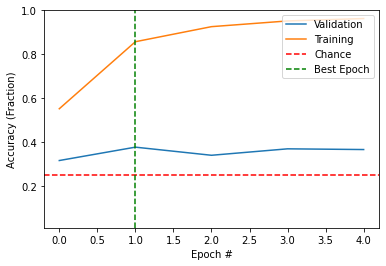

In [ ]:
# define our monitor. Don't worry about the parameters here except for './model.h5' which is the file that our model saves to
monitor = ModelCheckpoint('./model.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

### YOUR CODE HERE (get the train data and test data!)
train_data, train_labels = get_train_data(flatten=True)
test_data, test_labels = get_test_data(flatten=True)
### END CODE

# Reshape the data.
train_data = train_data.reshape([-1, 64, 64, 3])
test_data = test_data.reshape([-1, 64, 64, 3])

# Convert string labels into numpy arrays.
train_labels = label_to_numpy(train_labels)
test_labels = label_to_numpy(test_labels)

### YOUR CODE HERE (fit your model!)
history = model_2.fit(train_data, train_labels, epochs = 5, validation_data = (test_data, test_labels), shuffle = True, callbacks = [monitor])
plot_acc(history)
### END CODE

As our model trained, it told us a few things. The most important things to us are:
* how accurate it was when training on the training set (reported as `acc`)
* how accurate it was on the test set (reported as `val_acc`)


We can actually plot how how well our model did across epochs using the model's `history`!
To do this, we call:
```
plot_acc(history)
```

Try `plot_acc` below!

In [ ]:
### YOUR CODE HERE

### END CODE

## Instructor-Led Discussion

Is this a good model? Does your model overfit? How do you know?

# Milestone 3. Exploring Convolutional Neural Networks

So, how is a convolutional neural network specified in tensorflow/keras? Let's walk through this!

### Exercise (Coding)


Our convolutional neural network is specified via:

```
cnn = Sequential()
cnn.add(Conv2D(64, (3, 3), input_shape=(__, __, __)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = NUM_OUTPUTS, activation = 'softmax'))
```

And compiled with:

```
cnn.compile(loss=__, optimizer=__, metrics=__)
```

We see that we have a 1 convolution layer that takes in our inputs, and then 2 dense layers. Overall this is a 3 layer network.

After specifying the network, we can compile it and train it just like before! Note:
* we want our `loss` to be `'categorical_crossentropy'`
* our `optimizer` will be  `optimizers.SGD(lr=1e-3, momentum=0.95)`
* our `metrics` are `['accuracy']`

In [ ]:
### YOUR CODE HERE - build and compile your cnn (hint: see above and fill in the blanks!)

# specify the network
cnn = Sequential()
cnn.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3))) # extra layer 1
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2))) # extra layer 2
cnn.add(Flatten())
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 4, activation = 'softmax'))

# compile the network
cnn.compile(loss='categorical_crossentropy', optimizer = optimizers.SGD(lr=1e-3, momentum=0.95), metrics = ['accuracy'])

### END CODE

Once we've compiled the network, train it for 100 epochs.
Remember how you did this for the MLP (`model_2`)?



In [ ]:
### YOUR CODE HERE
cnnhistory = cnn.fit(train_data, train_labels, epochs = 5, validation_data = (test_data, test_labels), shuffle = True, callbacks = [monitor])
### END CODE

Epoch 1/5
211/211 [==============================] - 7s 7ms/step - loss: 1.1477 - accuracy: 0.4636 - val_loss: 2.2993 - val_accuracy: 0.4043
Epoch 2/5
211/211 [==============================] - 1s 6ms/step - loss: 0.2810 - accuracy: 0.9258 - val_loss: 3.1882 - val_accuracy: 0.3554
Epoch 3/5
211/211 [==============================] - 1s 7ms/step - loss: 0.1443 - accuracy: 0.9589 - val_loss: 4.0664 - val_accuracy: 0.3065
Epoch 4/5
211/211 [==============================] - 1s 6ms/step - loss: 0.0902 - accuracy: 0.9753 - val_loss: 3.6590 - val_accuracy: 0.3315
Epoch 5/5
211/211 [==============================] - 1s 6ms/step - loss: 0.0530 - accuracy: 0.9894 - val_loss: 4.3122 - val_accuracy: 0.3109


And see how well it did! We are interested in visualizing the training and validation accuracy again.

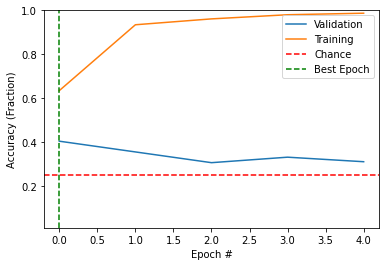

In [ ]:
### YOUR CODE HERE
plot_acc(cnnhistory)
### END CODE

**Nice training accuracy! Does the model still overfit?**


# Milestone 4. Expert models: Transfer learning

For all of the machine leanring we've done thus far, we've used models that were built from 'scratch'. All of these models are like newborn babies that have neither seen nor explored the world.

And, despite their cuteness, these babies require **a lot of education** to do much anything useful.

Unfortunately, our training manual is pretty small to all the things in the big wide world. So, just training on our manual is going to be inherently limited.


Luckily, there are **non-babies** (who we will refer to as experts) who have been out in the world for a long time! While these non-babies haven't seen our task, they have experience with a lot of other things. We can hand them our training manual and reasonably expect that they will pick up our task fairly quickly.

In deep learning, the idea of using a model trained on another task as a starting point for your model is known as **transfer learning**.

## Activity 4a. Transfer learning for driver distraction


### Instructor-Led Discussion

For our transfer learning, we're going to use 'experts' built upon the famous 'ImageNet' classification problem.

In ImageNet, participants were challenged to build machine learning models that could distinguish 14 million images' categories, where there were > 20,000 categories available.

Below, we see examples of 4 different categories.

![](http://cs231n.github.io/assets/trainset.jpg)



One of the experts we can use is VGG 16. VGG 16 was a network that was allowed to study the 14 million images 74 times.

After its studying, VGG 16 was able to guess something close to the real label (top-5 accuracy) better than a human can.

![](https://cdn-images-1.medium.com/max/1600/0*V1muWIDnPVwZUuEv.png)

We're going to take an expert model like VGG16 and let it train on OUR images. Hopefully, their experience with those 14 million images will help it understand driver distraction.

### Exercise (Coding) | Within a student group

Let's tap an expert model to help us out with our driver distraction prediction!

We provide a wrapper that lets you 'call' up and employ expert models. You can call it like...

```
transfer = TransferClassifier(name = 'VGG16')
```

The wrapper will also add a few new layers to the model that can learn specifics about **our task**.


The experts we have on hand are:
* `VGG16`
* `VGG19`
* `ResNet50`
* `DenseNet121`



Afterwards, see if you can get 85% accuracy with your model!

In [ ]:
# As always, we get our data first
train_data, train_labels = get_train_data(flatten=True)
test_data, test_labels = get_test_data(flatten=True)

train_data = train_data.reshape([-1, 64, 64, 3])
test_data = test_data.reshape([-1, 64, 64, 3])

train_labels = label_to_numpy(train_labels)
test_labels = label_to_numpy(test_labels)

### YOUR CODE HERE
transfer = TransferClassifier(name = 'VGG19')
history = transfer.fit(train_data, train_labels, epochs = 5, validation_data = (test_data, test_labels), shuffle = True, callbacks = [monitor])
#plot_acc(history)
train_data.shape
### END CODE

80142336/80134624 [==============================] - 0s 0us/step
Epoch 1/5
211/211 [==============================] - 15s 66ms/step - loss: 1.2778 - accuracy: 0.3738 - val_loss: 1.1664 - val_accuracy: 0.5913
Epoch 2/5
211/211 [==============================] - 13s 62ms/step - loss: 0.2352 - accuracy: 0.9212 - val_loss: 0.3887 - val_accuracy: 0.8576
Epoch 3/5
211/211 [==============================] - 13s 63ms/step - loss: 0.0600 - accuracy: 0.9846 - val_loss: 0.6495 - val_accuracy: 0.8065
Epoch 4/5
211/211 [==============================] - 13s 63ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.6241 - val_accuracy: 0.8054
Epoch 5/5
211/211 [==============================] - 13s 63ms/step - loss: 0.0261 - accuracy: 0.9955 - val_loss: 0.5980 - val_accuracy: 0.7957


(6724, 64, 64, 3)


## (Optional) Activity 4b. Transfer learning in tensorflow/keras

If you want to see how to implement transfer learning in tensorflow/keras, you can try this exercise!


### Exercise (Coding) | Within a student group


First, we will check out our keras toolbox's prebuilt machines and get VGG16.

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

Let's now load up VGG-16. We only want the convolution layers of the model - that is, the layers that are most responsible for giving the model its visual understanding. The 'Dense/Fully Connected (FC)' layers are thought to be more specific to the ImageNet challenge.

In [ ]:
# load the vgg network that is an 'expert' at 'imagenet' but do not include the FC layers
vgg_expert = VGG19(weights = 'imagenet', include_top = False, input_shape = (64, 64, 3))

Now, we're going to plug the vgg expert into a custom model. to do this, we do the following:

In [ ]:
vgg_model = Sequential()
vgg_model.add(vgg_expert)

We want to add custom layers to our model... specifically,
* `GlobalAveragePooling2D() # helps our vgg expert`
* `Dense(1024, activation = 'relu') # we've seen dense before!`
* `Dropout(0.3) # we've experimented with dropout before! (pick 30% of weights and assign them = 0 in order to not identify random patterns and prevent overfitting)`
* `Dense(512, activation = 'relu')`
* `Dropout(0.3)`
* `Dense(4, activation = 'sigmoid') # our output layer!`

### Instructor-Led Discussion: Why do we add these models to the end of the network?

In [ ]:
# add the extra layers here

vgg_model.add(GlobalAveragePooling2D()) # helps with vgg expert
vgg_model.add(Dense(1024, activation = 'relu'))
vgg_model.add(Dropout(0.3))
vgg_model.add(Dense(512, activation = 'relu'))
vgg_model.add(Dropout(0.3))
vgg_model.add(Dense(4, activation = 'sigmoid')) # output layer

And finally compile it with
* loss: `categorical_crossentropy`
* optimizer: `optimizers.SGD(lr = 1e-4, momentum = 0.95)`
* metrics: `accuracy`


In [ ]:
# compile our model
### YOUR CODE HERE
vgg_model.compile(loss='categorical_crossentropy', optimizer = optimizers.SGD(lr=1e-4, momentum=0.95), metrics = ['accuracy'])
### END CODE

Finally, hand our model its training manual, and let it train.

In [ ]:
### YOUR CODE HERE
history = vgg_model.fit(train_data, train_labels, epochs = 20, validation_data = (test_data, test_labels), shuffle = True, callbacks = [monitor])
### END CODE

Epoch 1/20
211/211 [==============================] - 14s 65ms/step - loss: 1.2357 - accuracy: 0.4087 - val_loss: 1.5381 - val_accuracy: 0.5261
Epoch 2/20
211/211 [==============================] - 14s 64ms/step - loss: 0.1931 - accuracy: 0.9426 - val_loss: 0.7264 - val_accuracy: 0.7891
Epoch 3/20
211/211 [==============================] - 14s 65ms/step - loss: 0.0707 - accuracy: 0.9793 - val_loss: 0.7226 - val_accuracy: 0.7478
Epoch 4/20
211/211 [==============================] - 14s 66ms/step - loss: 0.0425 - accuracy: 0.9882 - val_loss: 1.0674 - val_accuracy: 0.6772
Epoch 5/20
211/211 [==============================] - 14s 65ms/step - loss: 0.0730 - accuracy: 0.9799 - val_loss: 0.6969 - val_accuracy: 0.8022
Epoch 6/20
211/211 [==============================] - 14s 65ms/step - loss: 0.0200 - accuracy: 0.9942 - val_loss: 0.5645 - val_accuracy: 0.8239
Epoch 7/20
211/211 [==============================] - 14s 64ms/step - loss: 0.0132 - accuracy: 0.9966 - val_loss: 0.7346 - val_accuracy:

Give your model its test, and see how well it works
(Use plot_acc to visualize it!)

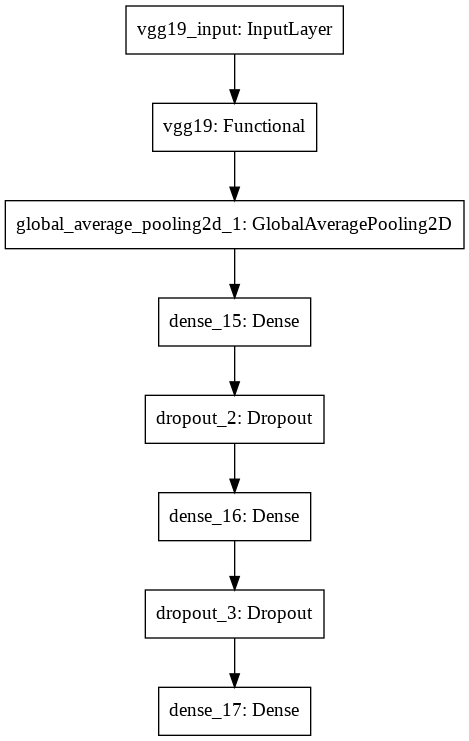

In [ ]:
### YOUR CODE HERE
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(vgg_model, to_file=dot_img_file, show_shapes=False)
### END CODE

## Nice! Hopefully your transfer learning model did much better on the validation data set.

![](http://static1.squarespace.com/static/56ccc8724c2f8548059fbcfe/58f6daea15d5dbcc64ef63aa/5cae2d770d92977242838baa/1557942174418/SW-DistractedDriving-Clean-1.jpg?format=1500w)